# Foundations of Robotics Final project- Abhimanyu Suthar
Net ID- abs9477


### I have programmed the following components below:

### 1. Forward kinematics
#### This has been done via Classes. There are various functions in the class that can be used to output:
 1. Frame transformations 
 2. Position of each joint with respect to frame 0 
 3. End effector (Frame-6) transformation matrix 
 4. Orientation of end-effector 
 5. Jacobian 
 6. Orientation of first frame 
 
### 2. Inverse Kinematics using Newton_raphson algorithm 
### 3. Visualization using pybullet
### 4. Inverse kinematics with Jacobian
### 5. Inverse Dynamics
### 6. Trajectory generation






In [1]:
# Imported libraries
import numpy as np
import math as m 
import matplotlib.pyplot as plt
import time
import scipy

## 1. Forward Kinematics 

In [2]:
# Implementing class/library for kinematics
class Robot:
    
    def __init__(self, theta1,theta2,theta3,theta4,theta5,theta6):
        self.theta1 = theta1
        self.theta2 = theta2
        self.theta3 = theta3
        self.theta4 = theta4
        self.theta5 = theta5
        self.theta6 = theta6
           

    def _0T1(self):
        """
        Calculates the transformation matrix from frame 1 to frame 0.

        Returns:
        - numpy.ndarray: 4x4 transformation matrix.
        """
        x_in = np.radians(self.theta1)
        d1 = 1
        a1 = 0
        
        _T1 = np.array([[m.cos(-m.pi/2 + x_in ), -m.cos(m.pi/2)*m.sin(-m.pi/2+ x_in), m.sin(m.pi/2)*m.sin(-m.pi/2+x_in), a1*m.cos(-m.pi/2)  ],[ m.sin(-m.pi/2+x_in) , m.cos(m.pi/2)*m.cos(-m.pi/2+x_in), -m.sin(m.pi/2)*m.cos(-m.pi/2+x_in), a1*m.sin(-m.pi/2) ],[ 0 , m.sin(m.pi/2), m.cos(m.pi/2), d1 ],[ 0 , 0, 0, 1]])
       
        return _T1
       
    def _1T2(self):
        """
        Calculates the transformation matrix from frame 2 to frame 1.

        Returns:
        - numpy.ndarray: 4x4 transformation matrix.
        """
        x_in = np.radians(self.theta2)
        a2 = 1
        
        _T2 = np.array([[m.cos(m.pi/2 + x_in ), -m.cos(0)*m.sin(m.pi/2+ x_in), m.sin(0)*m.sin(m.pi/2+x_in), a2*m.cos(m.pi/2) ],[ m.sin(m.pi/2+x_in) , m.cos(0)*m.cos(m.pi/2+x_in), -m.sin(0)*m.cos(m.pi/2+x_in), a2*m.sin(m.pi/2) ],[ 0 , m.sin(0), m.cos(0), 0 ],[ 0 , 0, 0, 1]]) 
        return _T2 
    
   
    def _2T3(self):
        """
        Calculates the transformation matrix from frame 3 to frame 2.

        Returns:
        - numpy.ndarray: 4x4 transformation matrix.
        """
        x_in = np.radians(self.theta3)
        a3= 0
        d3 = 2
        
        _T3 = np.array([[m.cos(-m.pi/2 + x_in ), -m.cos(-m.pi/2)*m.sin(m.pi/2+ x_in), m.sin(-m.pi/2)*m.sin(m.pi/2+x_in), a3*m.cos(-m.pi/2) ],[ m.sin(-m.pi/2+x_in) , m.cos(-m.pi/2)*m.cos(-m.pi/2+x_in), -m.sin(-m.pi/2)*m.cos(-m.pi/2+x_in), a3*m.sin(-m.pi/2) ],[ 0 , m.sin(-m.pi/2), m.cos(-m.pi/2), d3 ],[ 0 , 0, 0, 1]])
        return _T3
    
  
    def _3T4(self):
        """
        Calculates the transformation matrix from frame 4 to frame 3.

        Returns:
        - numpy.ndarray: 4x4 transformation matrix.
        """
        
        x_in = np.radians(self.theta4)
        d4 = 1.1
        a4 = 0
        _T4 = np.array([[m.cos( x_in ), -m.cos(m.pi/2)*m.sin( x_in), m.sin(m.pi/2)*m.sin(x_in), a4*m.cos(0) ],[ m.sin(x_in) , m.cos(m.pi/2)*m.cos(x_in), -m.sin(m.pi/2)*m.cos(x_in), a4*m.sin(0) ],[ 0 , m.sin(m.pi/2), m.cos(m.pi/2), d4 ],[ 0 , 0, 0, 1]])
        return _T4
    

    def _4T5(self):
        """
        Calculates the transformation matrix from frame 5 to frame 4.

        Returns:
        - numpy.ndarray: 4x4 transformation matrix.
        """
        x_in = np.radians(self.theta5)
        a5 = 2
        d5 = 0.8
        _T5 = np.array([[m.cos(m.pi + x_in ), -m.cos(-m.pi/2)*m.sin(m.pi+ x_in), m.sin(-m.pi/2)*m.sin(m.pi +x_in), a5*m.cos(m.pi/2) ],[ m.sin(m.pi+x_in) , m.cos(-m.pi/2)*m.cos(m.pi+x_in), -m.sin(-m.pi/2)*m.cos(m.pi+x_in), a5*m.sin(m.pi/2) ],[ 0 , m.sin(-m.pi/2), m.cos(-m.pi/2), d5 ],[ 0 , 0, 0, 1]])
        return _T5
    
    def _5T6(self):
        """
        Calculates the transformation matrix from frame 6 to frame 5.

        Returns:
        - numpy.ndarray: 4x4 transformation matrix.
        """
        x_in = self.theta6
        a6 = 10
        d6 = 0
        _T6 = np.array([[m.cos(0 + x_in ), -m.cos(0)*m.sin(0+ x_in), m.sin(0)*m.sin(+x_in), a6*m.cos(x_in) ],[ m.sin( x_in) , m.cos(0)*m.cos(x_in), -m.sin(0)*m.cos( x_in), a6*m.sin(x_in) ],[ 0 , m.sin(0), m.cos(0), d6 ],[ 0 , 0, 0, 1]])
        return _T6

    
        
    def _jointpos(self):
        """
        Calculates joint positions from frame 1 to 5.
        """
        
        T1 = self._0T1
        T2 = self._1T2
        T3 = self._2T3
        T4 = self._3T4
        T5 = self._4T5
        T6 = self._5T6
        op1 = np.matmul(T1(),T2()) # frame 2 to 0
        op2 = np.matmul(op1, T3()) # frame 3 to 0
        op3 = np.matmul(op2, T4()) # frame 4 to 0  
        op4 = np.matmul(op3, T5()) # frame 5 to 0
        op5 = np.matmul(op4, T6()) # frame 6 to 0
        return T1()[:,3] ,op1[:,3], op2[:,3], op3[:,3], op4[:,3]
    
    def _jointsvec(self):
        """
        Calculates joint vectors for frames 1 to 5.
        i.e. Z frame 

        Returns:
        - tuple of numpy.ndarray: Joint vectors for frames 1 to 5.
        """
        T1 = self._0T1
        T2 = self._1T2
        T3 = self._2T3
        T4 = self._3T4
        T5 = self._4T5
        T6 = self._5T6
        op1 = np.matmul(T1(),T2()) # frame 2 to 0
        op2 = np.matmul(op1, T3()) # frame 3 to 0
        op3 = np.matmul(op2, T4()) # frame 4 to 0  
        op4 = np.matmul(op3, T5()) # frame 5 to 0
        op5 = np.matmul(op4, T6()) # frame 6 to 0 
        return T1()[:,2], op1[:,2], op2[:,2], op3[:,2], op4[:,2], op5[:,2]
        
    def _endeff(self):
        """
        Calculates the end effector matrix.

        Returns:
        - numpy.ndarray: End effector transformation matrix 0T6.
        """
        T1 = self._0T1
        T2 = self._1T2
        T3 = self._2T3
        T4 = self._3T4
        T5 = self._4T5
        T6 = self._5T6
        op1 = np.matmul(T1(),T2()) # frame 2 to 0
        op2 = np.matmul(op1, T3()) # frame 3 to 0
        op3 = np.matmul(op2, T4()) # frame 4 to 0  
        op4 = np.matmul(op3, T5()) # frame 5 to 0
        op5 = np.matmul(op4, T6())
       
        return op5
    
    def _ori(self):
        """
        Calculates the orientation of the end effector.

        Returns:
        - numpy.ndarray: Orientation in terms of Euler angles (theta_x, theta_y, theta_z).
        """
        T1 = self._0T1
        T2 = self._1T2
        T3 = self._2T3
        T4 = self._3T4
        T5 = self._4T5
        T6 = self._5T6
        op1 = np.matmul(T1(),T2()) # frame 2 to 0
        op2 = np.matmul(op1, T3()) # frame 3 to 0
        op3 = np.matmul(op2, T4()) # frame 4 to 0  
        op4 = np.matmul(op3, T5()) # frame 5 to 0
        op5 = np.matmul(op4, T6())
        theta_x = np.degrees(np.arctan2(op5[2,1],op5[2,2]))
        theta_y = np.degrees(np.arctan2(op5[2,0], m.sqrt((op5[2,1])**2+ (op5[2,2])**2)))
        theta_z = np.degrees(np.arctan2(op5[1,0],op5[0,0]))
        
        return np.array([theta_x, theta_y, theta_z]) 
    
    def _Jacobian(self):
        """
        Calculates the Jacobian matrix for the robot.

        Returns:
        - numpy.ndarray: Jacobian matrix.
        """
   
        zs =  Robot._jointsvec(self)
        end_effector_position = Robot._endeff(self)
        p6 = end_effector_position[:,3][:3] 
        pos2 = p6 - zs[0][:3] #p6 - p1
        pos3 = p6- zs[1][:3] #p6 - p2
        pos4 = p6 - zs[2][:3]#p6 - p3
        pos5 = p6 - zs[3][:3] #p6 - p4
        pos6 = p6 - zs[4][:3] #  p6 -p5
        
        z0 = np.array([0,0,1]).transpose()
        entry1 = np.cross(z0,p6)
        entry2 = np.cross(zs[0][:3],pos2)
        entry3 = np.cross(zs[1][:3],pos3)
        entry4 = np.cross(zs[2][:3],pos4)
        entry5 = np.cross(zs[3][:3],pos5)
        entry6 = np.cross(zs[4][:3],pos6)
        
        e1 = np.expand_dims(entry1,axis=0).transpose()
        E1 = np.append(e1,z0)

        e2 = np.expand_dims(entry2, axis=0).transpose()
        E2 = np.append(e2,zs[0][:3])

        e3 = np.expand_dims(entry3, axis=0).transpose()
        E3 = np.append(e3,zs[1][:3])

        e4 = np.expand_dims(entry4, axis=0).transpose()
        E4 = np.append(e4,zs[2][:3])

        e5 = np.expand_dims(entry5, axis=0).transpose()
        E5 = np.append(e5,zs[3][:3])

        e6 = np.expand_dims(entry6, axis=0).transpose()
        E6 = np.append(e6,zs[4][:3])

        J = np.column_stack((E1,E2,E3,E4,E5,E6))
        
        return J 
        
    
    



## Test of forward kinematics 


In [3]:

# Instantiation of class 
test = Robot(12,12,12,12,12,12)

# Function to get final position of frame 5 based on forward kinematics 
jointpos = test._jointpos()
end = test._endeff()[:3,3]
cobian = test._Jacobian()
print('Joint positions: ', jointpos)
print("""
"""
      )
print('End effector position: ', end)
print("""
"""
      )
print('Jacobian matrix: ', cobian)




Joint positions:  (array([ 0., -0.,  1.,  1.]), array([ 7.26251857e-17, -4.71633471e-17,  2.00000000e+00,  1.00000000e+00]), array([-1.9562952 , -0.41582338,  2.        ,  1.        ]), array([-1.9562952 , -0.41582338,  0.9       ,  1.        ]), array([-2.69012132, -0.727147  , -1.03234776,  1.        ]))


End effector position:  [-10.8241465    4.04252444  -2.1080181 ]


Jacobian matrix:  [[-4.04252444e+00  4.38281607e-01  4.38281607e-01  4.04252444e+00
   4.78487483e-01 -3.92443580e+00]
 [-1.08241465e+01 -2.06195285e+00 -2.06195285e+00  1.08241465e+01
  -2.84899566e+00 -1.13123984e+01]
 [ 0.00000000e+00 -6.20465218e+00 -6.20465218e+00  4.54931224e-16
  -7.92040315e+00 -1.54267116e+00]
 [ 0.00000000e+00 -9.78147601e-01 -9.78147601e-01 -1.28541878e-16
  -9.17282652e-01  8.09097759e-02]
 [ 0.00000000e+00 -2.07911691e-01 -2.07911691e-01  9.00361894e-17
  -3.89154528e-01 -1.72738877e-01]
 [ 1.00000000e+00  6.12323400e-17  6.12323400e-17 -1.00000000e+00
   8.45653032e-02  1.06086495e+00]

In [18]:
end_effector_pos = []
theta1_r = np.linspace(-30,30,5)
theta2_r = np.linspace(-30,30,5)
theta3_r = np.linspace(-30,30,5)
theta4_r = np.linspace(30,30,5)
theta5_r = np.linspace(30,30,5)
theta6_r = np.linspace(30,30,5)

for theta1 in theta1_r:
    for theta2 in theta2_r:
        for theta3 in theta3_r:
            for theta4 in theta4_r:
                for theta5 in theta5_r:
                    for theta6 in theta6_r:
                        
                        robot = Robot(theta1,theta2,theta3,theta4,theta5,theta6)
                        f = robot._endeff()[:,3][:3]
                        end_effector_pos.append(f)
                        print('step done')
                        
end_effector_positions = np.array(end_effector_pos)
                        

step done
step done
step done
step done
step done
step done
step done
step done
step done
step done
step done
step done
step done
step done
step done
step done
step done
step done
step done
step done
step done
step done
step done
step done
step done
step done
step done
step done
step done
step done
step done
step done
step done
step done
step done
step done
step done
step done
step done
step done
step done
step done
step done
step done
step done
step done
step done
step done
step done
step done
step done
step done
step done
step done
step done
step done
step done
step done
step done
step done
step done
step done
step done
step done
step done
step done
step done
step done
step done
step done
step done
step done
step done
step done
step done
step done
step done
step done
step done
step done
step done
step done
step done
step done
step done
step done
step done
step done
step done
step done
step done
step done
step done
step done
step done
step done
step done
step done
step done
step done


In [19]:
end_effector_positions

array([[-11.36654899,   4.14726676,  -3.95156279],
       [-11.36654899,   4.14726676,  -3.95156279],
       [-11.36654899,   4.14726676,  -3.95156279],
       ...,
       [ -9.27491286,  -7.7700868 ,   3.29407729],
       [ -9.27491286,  -7.7700868 ,   3.29407729],
       [ -9.27491286,  -7.7700868 ,   3.29407729]])

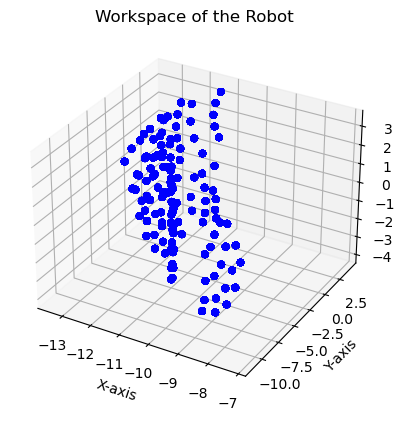

In [20]:
# Visualize the workspace
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(end_effector_positions[:, 0], end_effector_positions[:, 1], end_effector_positions[:, 2], c='b', marker='o')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.set_title('Workspace of the Robot')
plt.show()

In [ ]:
plt.figure()
ax = plt.axes(projection='3d')

ax.plot3D(-5, 5, -5, 'blue')
for i in range(72):
    ax.scatter3D(list6[i][0],list6[i][1],list6[i][2])
    plt.suptitle('Workspace analysis for end-effector')
    plt.xlabel('X coordinate')
    
    plt.ylabel('Y coordinate')
    ax.set_zlabel('Z coordinate')




# 2. Inverse kinematics using Newton-Raphson method

### Below is the code that iterates over initial guesses of theta until it converges or till the loop conditions are met

In [13]:
# Implementing the Newton-Raphson method, now that I have the jacobian matrix
pos = np.array([end[0],end[1],end[2]])
POS = np.expand_dims(pos, axis =0).transpose()
print(POS)
st1 = 10
st2 = 10
st3 = 10
st4 = 10
st5 = 10
st6 = 10
Error_P = [500]

[[-10.8241465 ]
 [  4.04252444]
 [ -2.1080181 ]]


In [14]:
# Iterating for a maximum of 1000 iterations
for i in range(0, 1000):

    # Creating a Robot instance with current joint angles
    test2 = Robot(st1, st2, st3, st4, st5, st6)
    
    # Obtaining the end effector position from the current configuration
    end2 = test2._endeff()[:, 3]
    
    # Extracting the first three elements of the end effector position
    End2 = np.expand_dims(end2[:3], axis=0).transpose()

    # Calculating the error in end effector position
    err_P = np.subtract(POS[0:3], End2)
    Err_P = np.linalg.norm(err_P)
    
    # Inserting the error into a list for analysis or visualization
    Error_P.insert(i, Err_P)
    
    # Setting the step size for the iterative update
    alpha = 1

    # Recalculating the error for subsequent use
    err_P = np.subtract(POS[0:3], End2)
    Err_P = np.linalg.norm(err_P)

    # Obtaining the Jacobian matrix for the robot
    J1 = test._Jacobian()
    Jv = J1[0:3]
    
    # Calculating the pseudo-inverse of the Jacobian matrix
    Jv_pseudo = np.linalg.pinv(Jv)

    # Creating a column vector from the error
    ERR = np.expand_dims(Err_P, axis=0).transpose()
    
    # Calculating the norm of the error vector
    norm_error = np.linalg.norm(ERR)

    # Calculating the change in joint angles using the pseudo-inverse and error
    D_theta = Jv_pseudo @ err_P

    # Updating joint angles with a step size
    st1 = st1 + alpha * (D_theta[0][0])
    st2 = st2 + alpha * (D_theta[1][0])
    st3 = st3 + alpha * (D_theta[2][0])
    st4 = st4 + alpha * (D_theta[3][0])
    st5 = st5 + alpha * (D_theta[4][0])
    st6 = st6 + alpha * (D_theta[5][0])

    # Printing joint angles and error information if the error is below a threshold
    if norm_error < 0.1:
        print("""
        YESSSSS

        """)
        print("st1: ", st1)
        print("st2: ", st2)
        print("st3: ", st3)
        print("st4: ", st4)
        print("st5: ", st5)
        print("st6: ", st6)
        print("  ", i, norm_error)

        print("  ",i,  norm_error)
# Error_theta.insert(i,Err_theta[i])








In [15]:
print(norm_error)
err_P
print(End2)

print(st1)
print(st2)
print(st3)
print(st4)
print(st5)
print(st6)

13.823727991071236
[[ 1.91587324]
 [-0.71553356]
 [ 0.37154572]]
20.951795025505003
-38.107129095398456
-38.10712909539847
-0.9517950255050291
-51.1906113464843
8.96615144732631


In [16]:
D_theta

array([[ 1.86216086e-05],
       [-6.78810845e-05],
       [-6.78810845e-05],
       [-1.86216086e-05],
       [-8.62789280e-05],
       [ 1.70223987e-06]])

# Plotting delta(theta) vs time to inspect the function

# Visualization

In [ ]:
import pybullet as p

#
p.connect(p.GUI)

robot_urdf_path = "/Users/abhimanyusuthar/anaconda3/Robotics/gitrepo/bullet3/examples/pybullet/gym/pybullet_data/xarm/xarm6_robot.urdf"
robot_id = p.loadURDF(robot_urdf_path, useFixedBase=True)

In [ ]:
import time
# home configuration 
initial_joint_angles = [m.radians(0), m.radians(30), m.radians(0), m.radians(-180), m.radians(0), m.radians(90),m.radians(0)]
for i in range(0,p.getNumJoints(robot_id)-1):
    p.resetJointState(robot_id, i, initial_joint_angles[i])

# for 3rd pos: theta-180
# for 1st pos: theta + 30
# for second to last position: theta + 90
# State of robot after inputting an angle
final = [m.radians(0), m.radians(30), m.radians(0), m.radians(-180), m.radians(0), m.radians(90),m.radians(0)]
for i in range(0,p.getNumJoints(robot_id)-1):
    p.resetJointState(robot_id,i,final[i])

for i in range(500):
    p.stepSimulation()
    time.sleep(1/240) 

# Extra credit
# Inverse kinematics with Jacobian



In [8]:
# Adjoint matrix
def adjoint(matrix):
    # Ensure the input is a NumPy array
    A = np.array(matrix)
    
    # Calculate the matrix of cofactors
    cofactors = np.linalg.inv(A) * np.linalg.det(A)

    # Transpose the matrix of cofactors to obtain the adjoint
    adj_A = cofactors.T

    return adj_A


In [9]:
# Initial joint angles for optimization
x1, x2, x3, x4, x5, x6 = 0, 0, 0, 25, 8, 0

# Desired end-effector transformation matrix
T6 = test._endeff()
Desired = np.linalg.inv(T6)

# Initialize the norm of angular velocity
norm_W = 500

# Optimization loop to minimize the angular velocity norm
while norm_W>0.2:

    for i in range(10):
        # Create a new instance of the robot with current joint angles
        test99 = Robot(x1,x2,x3,x4,x5,x6)
        
        # Obtain the current end-effector transformation matrix
        Current = test99._endeff()

         
        Current_inv = np.linalg.inv(Current)
        MAT = scipy.linalg.logm(Current_inv@Desired)
        
        
        # Compute the spatial velocity in the end-effector frame
        Vs = adjoint(Current)@MAT

        # Extract the angular velocity vector from the skew-symmetric matrix
        Rot = Vs[:3,0:3]
        omega = 0.5*(Rot - Rot.T)
        W = np.array([omega[2,1],omega[0, 2], omega[1, 0]])
        
        # Extract the translational velocity vector
        V = Vs[:3,3]
        
        # Combine translational and angular velocities into a single vector
        vw  = np.append(V,W)
        VW = np.expand_dims(vw,axis=1)

        # Update the norm of angular velocity
        norm_W = np.linalg.norm(W)

        # Compute the pseudo-inverse of the Jacobian matrix
        Jbian = test99._Jacobian()
        Jbian_psuedo = np.linalg.pinv(Jbian)
        
        # Compute the additive update to joint angles using the pseudo-inverse
        Additive= Jbian_psuedo@VW
        alpha = 0.01
        
        # Update joint angles
        x1 = x1 + alpha*Additive[0][0]
        x2 = x2 + alpha*Additive[1][0]
        x3 = x3 + alpha*Additive[2][0]
        x4 = x4 + alpha*Additive[3][0]
        x5 = x5 + alpha*Additive[4][0]
        x6 = x6 + alpha*Additive[5][0]
        
        # Print updated joint angles and angular velocity norm
        print('x1: ',x1)
        print('x2: ',x2)
        print('x3: ',x3)
        print('x4: ',x4)
        print('x5: ',x5)
        print('x6: ',x6)
        print(norm_W)

        





x1:  -0.002840599435804405
x2:  -0.0013588457907315597
x3:  -0.0013588457907315601
x4:  25.002840599435803
x5:  8.003735373038843
x6:  -0.001250620455570717
0.1384591718544575
x1:  -0.005677396589271912
x2:  -0.002718361111751763
x3:  -0.002718361111751763
x4:  25.00567739658927
x5:  8.00746786398466
x6:  -0.002497557006105969
0.13848040787169077
x1:  -0.008510403757077605
x2:  -0.004078540399949676
x3:  -0.004078540399949676
x4:  25.008510403757075
x5:  8.011197476648839
x6:  -0.003740823462397988
0.13850172913280895
x1:  -0.011339633184456242
x2:  -0.005439378143662813
x3:  -0.005439378143662814
x4:  25.011339633184456
x5:  8.014924214863214
x6:  -0.00498043356079542
0.1385231352700998
x1:  -0.014165097065493668
x2:  -0.006800868882135593
x3:  -0.006800868882135595
x4:  25.014165097065494
x5:  8.01864808247957
x6:  -0.006216400963782934
0.1385446259178715
x1:  -0.01698680754341604
x2:  -0.00816300720498424
x3:  -0.008163007204984241
x4:  25.016986807543415
x5:  8.022369083369153
x6: 

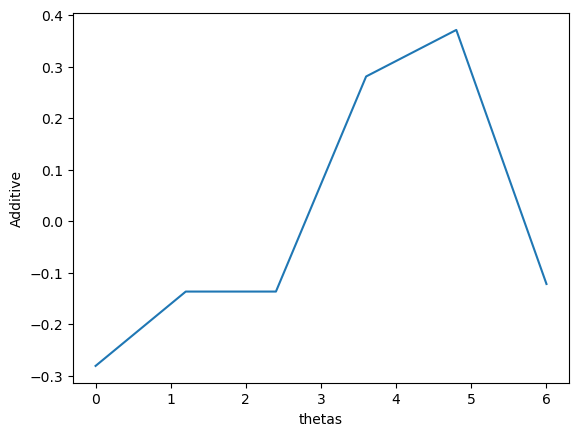

In [10]:
plt.figure()
theta = np.array([np.linspace(0,6,6)]).transpose()
time = np.linspace(0,30,45)
plt.xlabel('thetas')
plt.ylabel('Additive')
plt.plot(theta,Additive)

In [ ]:
test99._endeff()[:,3][:3]

In [ ]:
test._endeff()[:,3][:3]



# Extra credit
#  inverse dynamics 


In [7]:

def inverse_dynamics(p,F):
    # The above are the distances measured in the xyz frame 
    
    """
    Compute joint torques (inverse dynamics) based on position and force vectors.

    Parameters:
    - p (numpy.ndarray): Position vector [px, py, pz].
    - F (numpy.ndarray): Force vector [Fx, Fy, Fz].

    Returns:
    - numpy.ndarray: Joint torques [tau_x, tau_y, tau_z].
    """
    
    # Calculate joint torques using inverse dynamics equations
    tau_x = p[1]*F[2] - (p[2]*F[1])
    tau_y = (p[2]*F[0]) - (p[0]*F[2])
    tau_z = (p[0]*F[1]) - (p[1]*F[0])

    #taux = ry*Fz - rz*Fy
    #tauy = rz*Fx - rx*Fz 
    #tauz = rx*Fy - ry*Fx   

    return np.array([tau_x,tau_y,tau_z])

# Example usage:
p = np.array([1,1,1])
F = np.array([5,10,0])
Force = inverse_dynamics(p,F)


Jtoolw = test._Jacobian()[3:6]
Force_cartes = np.expand_dims(Force,axis=1)
tau_joints = -(Jtoolw.T@Force_cartes)
tau_joints


array([[-5.        ],
       [-8.74191755],
       [-8.74191755],
       [ 5.        ],
       [-7.64988039],
       [-3.6315326 ]])

# Extra credit
# Trajectory generation using cubic polynomial

Initial Joint Angles: [ 5  6  7 18  9 16]
Final Joint Angles: [15 14 13 12 11 10]


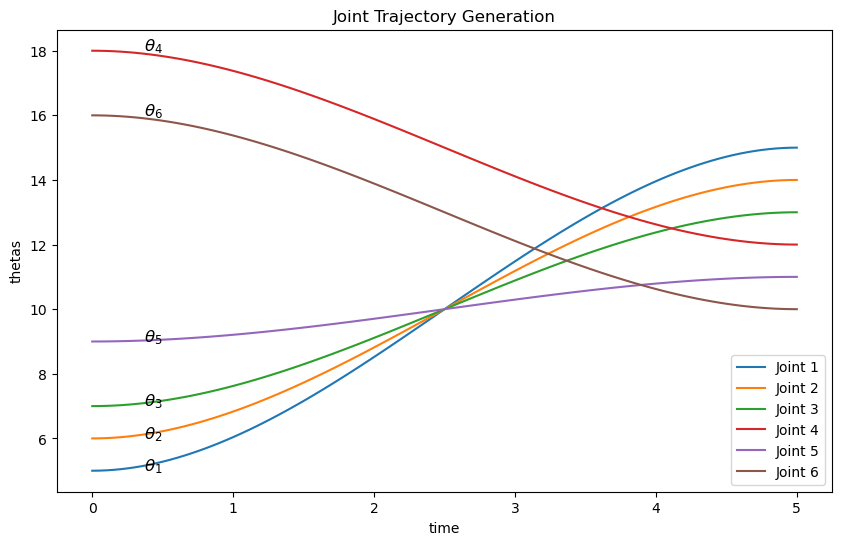

In [6]:
# Define initial and final joint angles (test case)
initial = np.array([5,6,7,18,9,16])
final = np.array([15,14,13,12,11,10])

# Display initial and final joint angles
print("Initial Joint Angles:", initial)
print("Final Joint Angles:", final)

# Define trajectory duration and time parameters
tf = 5
t0 = 0
num_points = 100

# Generate time vector
T = 5
t = np.linspace(0,T,100)
a = initial 
a1 =0
a2 = (3/tf**2)*(final -initial)
a3 = (-2/tf**3)*(final -initial)
#trajectory = a + a1*t + a2*t**2 + a3*t**3

# Initialize joint trajectory array
joint_trajectory = np.zeros((num_points, len(initial))) 

# Initialize list to store maximum accelerations for each joint
max_acc = []

# Generate joint trajectory using cubic polynomial for each joint angle
for i in range(len(initial)):
        # Calculate coefficients for cubic polynomial
        a = initial[i]
        b = 0
        c = 3 * (final[i] - initial[i]) / (T**2)
        d = 2 * (initial[i] - final[i]) / (T**3)
        
        # Calculate and store maximum acceleration for each joint
        max_acc.insert(i,(6/(T**2))*(final[i]-initial[i])) # maximum accleration

        # Evaluate cubic polynomial for each time point
        joint_trajectory[:, i] = a + b * t+ c * t**2 + d * t**3

# Plot the joint trajectory
plt.figure(figsize=(10, 6))
for i in range(joint_trajectory.shape[1]):
    plt.plot(t, joint_trajectory[:, i], label=f'Joint {i+1}')

plt.xlabel('time')
plt.ylabel('thetas')
plt.title('Joint Trajectory Generation')
plt.legend()


for i, angle in enumerate(initial):
    plt.text(0.5, initial[i], f'$\\theta_{i+1}$', fontsize=12, color='black', ha='right')


